In [379]:
import numpy as np
import pandas as pd
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold


In [380]:
ALPHA = 0.4

In [381]:
train_data = pd.read_csv('data/train.csv', index_col='id')
train_data.columns

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

In [382]:
features = train_data.drop('diagnosed_diabetes', axis=1)
labels = train_data['diagnosed_diabetes'].astype(int)

features.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
id,,,,,,,,,,,,,,,,,,,,,
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,108,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,123,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,124,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0


In [383]:
DROP_COLUMNS = ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
features = features.drop(columns=DROP_COLUMNS, axis=1)
features.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history
id,,,,,,,,,,,,,,,,,,
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,0,0,0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,0,0,0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,0,0,0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,0,1,0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,0,1,0


In [384]:
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
params = {
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "iterations": 4000,
    "learning_rate": 0.05,
    "depth": 6,
    "l2_leaf_reg": 6,
    "random_strength": 1.0,
    "bootstrap_type": "Bayesian",
    "bagging_temperature": 0.8,
    "min_data_in_leaf": 50,
    "random_seed": 42,
    "verbose": 200,
    "task_type": "GPU"   # TURN GPU ON
}
test_data = pd.read_csv('data/test.csv', index_col='id').drop(DROP_COLUMNS, axis=1)
test_data.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history
id,,,,,,,,,,,,,,,,,,
700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,70,64,209,55,135,111,0,0,0
700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,74,59,159,47,83,145,0,0,0
700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,71,75,173,43,99,184,0,0,0
700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,81,61,203,59,116,128,0,0,0
700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,78,79,177,59,87,133,0,0,0


In [385]:
feature_train, feature_test, label_train, label_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels
)

In [386]:
cat_model = CatBoostClassifier(**params)
cat_model.fit(
    feature_train, label_train,
    eval_set=(feature_test, label_test),
    early_stopping_rounds=100,
    use_best_model=True
)
test_preds = cat_model.predict_proba(feature_test)[:, 1]

print("=== CatBoost Classifier Performance ===")
accuracy = accuracy_score(label_test, (test_preds > ALPHA).astype(int))
precision = precision_score(label_test, (test_preds > ALPHA).astype(int))
recall = recall_score(label_test, (test_preds > ALPHA).astype(int))
f1 = f1_score(label_test, (test_preds > ALPHA).astype(int))
roc_auc = roc_auc_score(label_test, test_preds)
print(f'准确率: {accuracy:.4f}')
print(f'精确率: {precision:.4f}')
print(f'召回率: {recall:.4f}')
print(f'F1 分数: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6811745	best: 0.6811745 (0)	total: 4.69ms	remaining: 18.7s
200:	test: 0.7125534	best: 0.7125534 (200)	total: 745ms	remaining: 14.1s
400:	test: 0.7194808	best: 0.7194808 (400)	total: 1.49s	remaining: 13.3s
600:	test: 0.7217377	best: 0.7217377 (600)	total: 2.24s	remaining: 12.7s
800:	test: 0.7230201	best: 0.7230201 (800)	total: 3.02s	remaining: 12.1s
1000:	test: 0.7237268	best: 0.7237278 (997)	total: 3.8s	remaining: 11.4s
1200:	test: 0.7242094	best: 0.7242186 (1192)	total: 4.55s	remaining: 10.6s
1400:	test: 0.7245523	best: 0.7245523 (1400)	total: 5.3s	remaining: 9.83s
1600:	test: 0.7247908	best: 0.7247918 (1597)	total: 6.07s	remaining: 9.09s
1800:	test: 0.7249618	best: 0.7249660 (1793)	total: 6.82s	remaining: 8.33s
2000:	test: 0.7250790	best: 0.7250798 (1998)	total: 7.61s	remaining: 7.6s
2200:	test: 0.7251645	best: 0.7251649 (2199)	total: 8.37s	remaining: 6.84s
2400:	test: 0.7251892	best: 0.7252184 (2367)	total: 9.13s	remaining: 6.08s
2600:	test: 0.7252504	best: 0.7252550 (250

In [387]:
lgb_params = {
    'n_estimators': 200,
    'learning_rate': 0.03,
    'num_leaves': 64,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': "binary",
    'random_state': 42,
}

In [388]:
lgb_model = LGBMClassifier(**lgb_params)
lgb_model.fit(
    feature_train, label_train
)
lgb_test_preds = lgb_model.predict_proba(feature_test)[:, 1]
print("=== LightGBM Classifier Performance ===")
accuracy = accuracy_score(label_test, (lgb_test_preds > ALPHA).astype(int))
precision = precision_score(label_test, (lgb_test_preds > ALPHA).astype(int))
recall = recall_score(label_test, (lgb_test_preds > ALPHA).astype(int))
f1 = f1_score(label_test, (lgb_test_preds > ALPHA).astype(int))
roc_auc = roc_auc_score(label_test, lgb_test_preds)
print(f'准确率: {accuracy:.4f}')
print(f'精确率: {precision:.4f}')
print(f'召回率: {recall:.4f}')
print(f'F1 分数: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

[LightGBM] [Info] Number of positive: 349046, number of negative: 210954
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623296 -> initscore=0.503564
[LightGBM] [Info] Start training from score 0.503564
=== LightGBM Classifier Performance ===
准确率: 0.6651
精确率: 0.6610
召回率: 0.9498
F1 分数: 0.7795
ROC AUC: 0.7230


In [389]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    random_state=42,
)
xgb_model.fit(
    feature_train, label_train
)
xgb_test_preds = xgb_model.predict_proba(feature_test)[:, 1]
print("=== XGBoost Classifier Performance ===")
accuracy = accuracy_score(label_test, (xgb_test_preds > ALPHA).astype(int))
precision = precision_score(label_test, (xgb_test_preds > ALPHA).astype(int))
recall = recall_score(label_test, (xgb_test_preds > ALPHA).astype(int))
f1 = f1_score(label_test, (xgb_test_preds > ALPHA).astype(int))
roc_auc = roc_auc_score(label_test, xgb_test_preds)
print(f'准确率: {accuracy:.4f}')
print(f'精确率: {precision:.4f}')
print(f'召回率: {recall:.4f}')
print(f'F1 分数: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

=== XGBoost Classifier Performance ===
准确率: 0.6578
精确率: 0.6534
召回率: 0.9606
F1 分数: 0.7777
ROC AUC: 0.7155


In [390]:
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf.fit(
    feature_train, label_train
)
oof = rf.predict_proba(feature_test)[:, 1]
print("=== Random Forest Classifier Performance ===")
accuracy = accuracy_score(label_test, (oof > ALPHA).astype(int))
precision = precision_score(label_test, (oof > ALPHA).astype(int))
recall = recall_score(label_test, (oof > ALPHA).astype(int))
f1 = f1_score(label_test, (oof > ALPHA).astype(int))
roc_auc = roc_auc_score(label_test, oof)
print(f'准确率: {accuracy:.4f}')
print(f'精确率: {precision:.4f}')
print(f'召回率: {recall:.4f}')
print(f'F1 分数: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

=== Random Forest Classifier Performance ===
准确率: 0.6449
精确率: 0.6408
召回率: 0.9792
F1 分数: 0.7747
ROC AUC: 0.6998


In [409]:
feature_train.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history
id,,,,,,,,,,,,,,,,,,
404095,46,2,78,6.5,5.5,6.2,27.7,0.93,117,62,63,189,59,103,138,0,1,0
298008,62,3,63,5.4,8.1,9.0,28.3,0.90,117,86,72,198,64,99,170,0,0,0
143402,32,2,73,3.7,6.1,8.4,26.2,0.88,124,64,71,173,44,97,126,0,0,0
545969,60,1,71,6.3,7.5,8.7,23.7,0.85,102,70,58,165,44,91,121,0,0,0
181683,59,2,65,9.4,6.2,7.9,28.7,0.91,121,69,68,199,54,121,134,1,0,0


In [412]:
list(feature_test.columns)

['age',
 'alcohol_consumption_per_week',
 'physical_activity_minutes_per_week',
 'diet_score',
 'sleep_hours_per_day',
 'screen_time_hours_per_day',
 'bmi',
 'waist_to_hip_ratio',
 'systolic_bp',
 'diastolic_bp',
 'heart_rate',
 'cholesterol_total',
 'hdl_cholesterol',
 'ldl_cholesterol',
 'triglycerides',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history']

In [ ]:
print(cat_model.feature_importances_)

[10.78417189  0.53351336 29.68555761  2.31536     1.55297493  2.02575174
  3.80186458  1.77944162  2.34374079  1.69152505  2.44634117  2.76460651
  2.01217079  3.04983318  7.39042084 25.49177821  0.18206288  0.14888487]


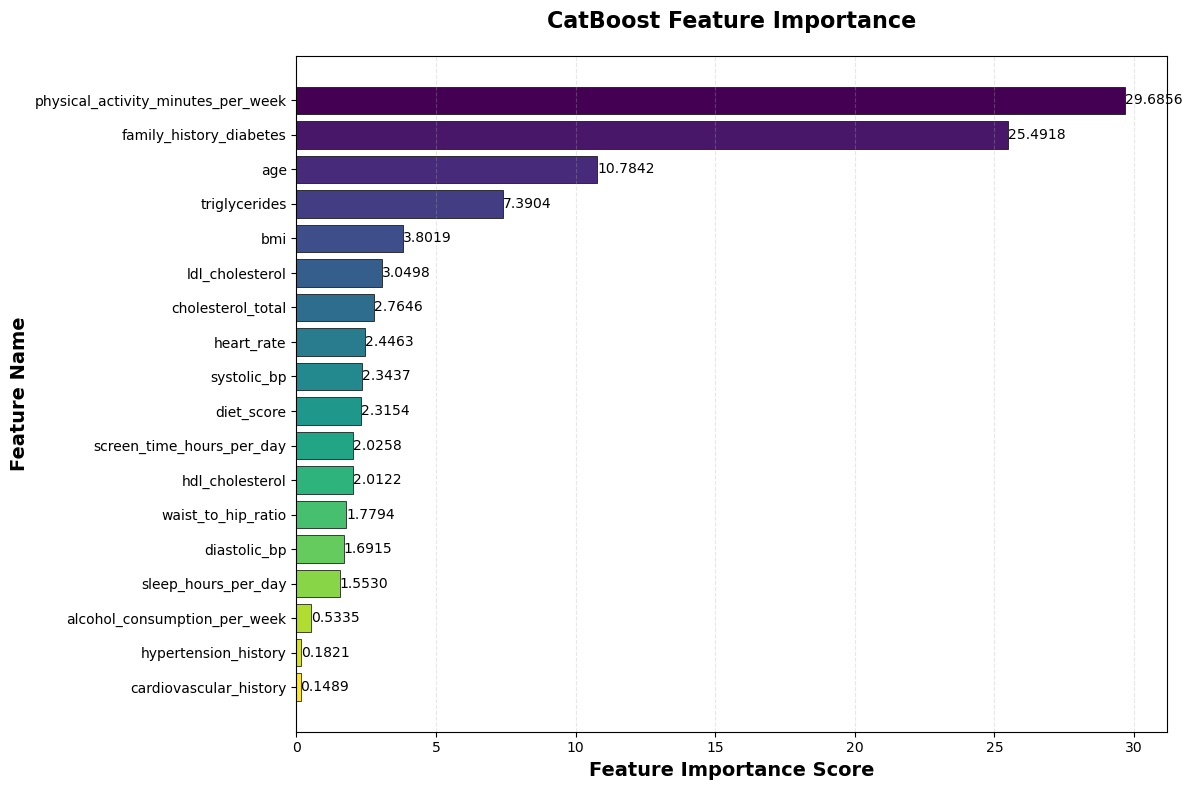

In [413]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --------------------------
# Step 1: 数据准备（需替换为你的真实特征名称和重要性数据）
# --------------------------
# 假设你有特征名称列表（请替换为你的真实特征名）
# 若不知道特征名称，可通过cat_model.feature_names_获取（前提是训练时传入了特征名）
feature_names = list(feature_train.columns)
feature_importances = cat_model.feature_importances_

# 封装为DataFrame，便于排序和处理
feature_df = pd.DataFrame({
    "Feature_Name": feature_names,
    "Importance": feature_importances
})

# 按特征重要性降序排序
feature_df = feature_df.sort_values(by="Importance", ascending=False).reset_index(drop=True)

# --------------------------
# Step 2: 绘制特征重要性图（横向条形图，更易展示特征名称）
# --------------------------
# 设置画布大小
plt.figure(figsize=(12, 8))

# 定义颜色（可选，美观性提升）
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_df)))

# 绘制横向条形图
bars = plt.barh(
    y=feature_df["Feature_Name"][::-1],  # 倒序显示，让重要性最高的在顶部
    width=feature_df["Importance"][::-1],
    color=colors[::-1],
    edgecolor="black",
    linewidth=0.5
)

# 设置标题和坐标轴标签
plt.title("CatBoost Feature Importance", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Feature Importance Score", fontsize=14, fontweight="bold")
plt.ylabel("Feature Name", fontsize=14, fontweight="bold")

# 添加网格（提升可读性）
plt.grid(axis="x", alpha=0.3, linestyle="--")

# 在条形图上标注具体数值（可选）
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.001,  # 数值标注位置（略高于条形右侧）
        bar.get_y() + bar.get_height()/2,  # 垂直居中
        f"{width:.4f}",  # 保留4位小数
        ha="left",
        va="center",
        fontsize=10
    )

# 调整布局（避免标签被截断）
plt.tight_layout()

# 保存图片（可选，分辨率300dpi）
plt.savefig("catboost_feature_importance.png", dpi=300, bbox_inches="tight")

# 显示图片
plt.show()

In [400]:
from scipy.stats import rankdata

cat_validation_preds = cat_model.predict_proba(feature_test)[:, 1]
lgb_validation_preds = lgb_model.predict_proba(feature_test)[:, 1]

validation_df = pd.DataFrame({
    'cat_preds': cat_validation_preds,
    'lgb_preds': lgb_validation_preds
})
validation_df["cat_rank"] = rankdata(validation_df["cat_preds"])
validation_df["lgb_rank"] = rankdata(validation_df["lgb_preds"])

k = 0.4

validation_df["final_preds"] = k * validation_df["cat_rank"] + (1 - k) * validation_df["lgb_rank"]
validation_df["final_preds"] /= validation_df["final_preds"].max()

print("=== Ensemble Model Performance ===")
accuracy = accuracy_score(label_test, (validation_df["final_preds"] > ALPHA).astype(int))
precision = precision_score(label_test, (validation_df["final_preds"] > ALPHA).astype(int))
recall = recall_score(label_test, (validation_df["final_preds"] > ALPHA).astype(int))
f1 = f1_score(label_test, (validation_df["final_preds"] > ALPHA).astype(int))
roc_auc = roc_auc_score(label_test, validation_df["final_preds"])
print(f'准确率: {accuracy:.4f}')
print(f'精确率: {precision:.4f}')
print(f'召回率: {recall:.4f}')
print(f'F1 分数: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')


=== Ensemble Model Performance ===
准确率: 0.6740
精确率: 0.7476
召回率: 0.7200
F1 分数: 0.7336
ROC AUC: 0.7248


In [407]:
validation_df = pd.DataFrame({
    'cat_preds': cat_validation_preds,
    'lgb_preds': lgb_validation_preds
})
validation_df["cat_norm"] = (validation_df["cat_preds"] - validation_df["cat_preds"].min()) / (validation_df["cat_preds"].max() - validation_df["cat_preds"].min())
validation_df["lgb_norm"] = (validation_df["lgb_preds"] - validation_df["lgb_preds"].min()) / (validation_df["lgb_preds"].max() - validation_df["lgb_preds"].min())

k = 0.8
validation_df["final_preds"] = k * validation_df["cat_norm"] + (1 - k) * validation_df["lgb_norm"]
print("=== Ensemble Model Performance (Normalized) ===")
accuracy = accuracy_score(label_test, (validation_df["final_preds"] > ALPHA).astype(int))
precision = precision_score(label_test, (validation_df["final_preds"] > ALPHA).astype(int))
recall = recall_score(label_test, (validation_df["final_preds"] > ALPHA).astype(int))
f1 = f1_score(label_test, (validation_df["final_preds"] > ALPHA).astype(int))
roc_auc = roc_auc_score(label_test, validation_df["final_preds"])
print(f'准确率: {accuracy:.4f}')
print(f'精确率: {precision:.4f}')
print(f'召回率: {recall:.4f}')
print(f'F1 分数: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

=== Ensemble Model Performance (Normalized) ===
准确率: 0.6742
精确率: 0.6740
召回率: 0.9245
F1 分数: 0.7796
ROC AUC: 0.7254


In [396]:
# 排名概率融合
cat_test_preds = cat_model.predict_proba(test_data)[:, 1]
lgb_test_preds = lgb_model.predict_proba(test_data)[:, 1]

cat_test_df = pd.DataFrame(cat_test_preds, columns=["diagnosed_diabetes"])
lgb_test_df = pd.DataFrame(lgb_test_preds, columns=["diagnosed_diabetes"])

cat_test_df["diagnosed_diabetes"] = (cat_test_df["diagnosed_diabetes"] - cat_test_df["diagnosed_diabetes"].min()) / (cat_test_df["diagnosed_diabetes"].max() - cat_test_df["diagnosed_diabetes"].min())
lgb_test_df["diagnosed_diabetes"] = (lgb_test_df["diagnosed_diabetes"] - lgb_test_df["diagnosed_diabetes"].min()) / (lgb_test_df["diagnosed_diabetes"].max() - lgb_test_df["diagnosed_diabetes"].min())

k = 0.8
final_test_preds = k * cat_test_df["diagnosed_diabetes"] + (1 - k) * lgb_test_df["diagnosed_diabetes"]
final_test_df = pd.DataFrame()
final_test_df['id'] = test_data.index
final_test_df['diagnosed_diabetes'] = (final_test_preds > ALPHA).astype(int)
final_test_df.to_csv('submission.csv', index=False)
final_test_df.head()



,id,diagnosed_diabetes
0,700000,1
1,700001,1
2,700002,1
3,700003,0
4,700004,1


In [393]:
# 排名概率融合
from scipy.stats import rankdata
cat_test_preds = cat_model.predict_proba(test_data)[:, 1]
lgb_test_preds = lgb_model.predict_proba(test_data)[:, 1]

cat_test_df = pd.DataFrame(cat_test_preds, columns=["diagnosed_diabetes"])
lgb_test_df = pd.DataFrame(lgb_test_preds, columns=["diagnosed_diabetes"])
cat_test_df["rank"] = rankdata(cat_test_df["diagnosed_diabetes"])
lgb_test_df["rank"] = rankdata(lgb_test_df["diagnosed_diabetes"])

test_df = pd.DataFrame({
    'id': test_data.index
})
test_df["diagnosed_diabetes"] = 0.5 * cat_test_df["rank"] + 0.5 * lgb_test_df["rank"]
test_df["diagnosed_diabetes"] /= test_df["diagnosed_diabetes"].max()

test_df["diagnosed_diabetes"] = (test_df["diagnosed_diabetes"] > ALPHA).astype(int)

test_df[["id", "diagnosed_diabetes"]].to_csv("data/submission.csv", index=False)
test_df.head()

,id,diagnosed_diabetes
0,700000,0
1,700001,1
2,700002,1
3,700003,0
4,700004,1
